# Title: Is there a relationship between a country's wealth and primary school enrollment?

Project by Anneline Huck, written for an online course by FutureLearn (Learn to Code for Data Analysis by the The Open University). This project is based on exercises from Week 3, designed by Michel Wermelinger.

In this analysis, we investigate whether there is a relation between primary school enrollment and the wealth of a country. It would be expected that wide primary school education is positively linked to employment rates and a good economy while countries with fewer children attending schools may be associated with less prosperity. 

In the following, we download data from World Bank and run a correlation between the gross enroment ratio and the GDP per Capita. 


## Getting the Data

We are using publicly available data from the World Bank. Three datasets were downoladed for this project: 

1. Gross enrollment ratio (% gross) (available here: https://data.worldbank.org/indicator/SE.PRM.ENRR?view=chart) lists the primary school enrollment as a ratio of total enrollment to the population of the age group that officially corresponds to the level of education)

2. Current GDP in US dollars (available here: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?view=chart) lists the GDP as the sum of gross value added by all resident producers in the economy including product taxes but excluding subsidies not included in the value of the products)

3. Population numbers (available here: https://data.worldbank.org/indicator/SP.POP.TOTL?view=chart) lists midyear estimates of total population counting all residents regardless of citizenship or legal status)

The datasets were downloaded in October 2018.

In [90]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *


The dataframes from World Bank have indicator names within their URL, and they are renamed for easier use. 

In [91]:
GDP_INDICATOR = 'NY.GDP.MKTP.CD'

EDUCATION_INDICATOR = 'NY.GDP.MKTP.CD'

POPULATION_INDICATOR = 'SP.POP.TOTL'


Dataframes are downloaded directly using pandas_datareader.

In [92]:
from pandas_datareader.wb import download

YEAR = 2013
gdpWB = download(indicator=GDP_INDICATOR, country='all', start=YEAR, end=YEAR)
educationWB = download(indicator=EDUCATION_INDICATOR, country='all', start =YEAR, end = YEAR)
populationWB = download(indicator=POPULATION_INDICATOR, country='all', start=YEAR, end = YEAR)

gdpWB.head()

,,NY.GDP.MKTP.CD
country,year,
Arab World,2013,2.866038e+12
Caribbean small states,2013,7.137877e+10
Central Europe and the Baltics,2013,1.422650e+12
Early-demographic dividend,2013,1.020090e+13
East Asia & Pacific,2013,2.127518e+13


In [94]:
educationWB.head()

,,NY.GDP.MKTP.CD
country,year,
Arab World,2013,2.866038e+12
Caribbean small states,2013,7.137877e+10
Central Europe and the Baltics,2013,1.422650e+12
Early-demographic dividend,2013,1.020090e+13
East Asia & Pacific,2013,2.127518e+13


In [95]:
populationWB.head()

,,SP.POP.TOTL
country,year,
Arab World,2013,3.817021e+08
Caribbean small states,2013,7.118888e+06
Central Europe and the Baltics,2013,1.037137e+08
Early-demographic dividend,2013,3.040701e+09
East Asia & Pacific,2013,2.252311e+09


The downloaded dataframes don't have row indexes, so we use reset_index() to reset them.


Since World Bank sometimes changes the layout of the data, we save the dataframes as CSV files (and then read them in again).

In [97]:
gdpWB.to_csv('gdp.csv')
educationWB.to_csv('education.csv')
populationWB.to_csv('population.csv') 

In [98]:
gdp = read_csv('gdp.csv')
gdp.head()


,country,year,NY.GDP.MKTP.CD
0,Arab World,2013,2.866038e+12
1,Caribbean small states,2013,7.137877e+10
2,Central Europe and the Baltics,2013,1.422650e+12
3,Early-demographic dividend,2013,1.020090e+13
4,East Asia & Pacific,2013,2.127518e+13


In [100]:
education = read_csv('education.csv')
education.head()

,country,year,NY.GDP.MKTP.CD
0,Arab World,2013,2.866038e+12
1,Caribbean small states,2013,7.137877e+10
2,Central Europe and the Baltics,2013,1.422650e+12
3,Early-demographic dividend,2013,1.020090e+13
4,East Asia & Pacific,2013,2.127518e+13


In [101]:
population = read_csv('population.csv')
population.head()

,country,year,SP.POP.TOTL
0,Arab World,2013,3.817021e+08
1,Caribbean small states,2013,7.118888e+06
2,Central Europe and the Baltics,2013,1.037137e+08
3,Early-demographic dividend,2013,3.040701e+09
4,East Asia & Pacific,2013,2.252311e+09


## Cleaning the data

Inspecting each of the World Bank dataframes separately demonstrates that the first rows have aggregated data for country groups, so we remove them. 


In [102]:
# gdp.head(50) Shows that the first country row is Afghanistan (row 47)
gdpCountries = gdp[47:]

In [103]:
# education.head(50) Shows that the first country row is Afghanistan (row 47)
educationCountries = education[47:]

In [104]:
# population.head(50) Shows that the first country row is Afghanistan (row 47)
populationCountries = population[47:]

Removing rows with missing data (na)

In [105]:
gdpCountries.isna() # Check whether there are nas 
gdpCountries = gdpCountries.dropna() # Drop rows with na

In [106]:
educationCountries.isna() # Check whether there are nas 
educationCountries = educationCountries.dropna() # Drop rows with na

In [107]:
populationCountries.isna() # Check whethere there are nas
populationCountries = populationCountries.dropna()

We also discard not needed columns.

In [108]:
COUNTRY = 'country'
headings = [COUNTRY, GDP_INDICATOR]
gdpClean = gdpCountries[headings]
gdpClean.head()

,country,NY.GDP.MKTP.CD
47,Afghanistan,2.026425e+10
48,Albania,1.277628e+10
49,Algeria,2.097550e+11
50,American Samoa,6.410000e+08
51,Andorra,3.281585e+09


In [109]:
headings = [COUNTRY, POPULATION_INDICATOR]
populationClean = populationCountries[headings]
populationClean.head()

,country,SP.POP.TOTL
47,Afghanistan,31731688.0
48,Albania,2895092.0
49,Algeria,38338562.0
50,American Samoa,55307.0
51,Andorra,80788.0


In [110]:
headings = [COUNTRY, EDUCATION_INDICATOR]
educationClean = educationCountries[headings]
educationClean.head()

,country,NY.GDP.MKTP.CD
47,Afghanistan,2.026425e+10
48,Albania,1.277628e+10
49,Algeria,2.097550e+11
50,American Samoa,6.410000e+08
51,Andorra,3.281585e+09


## Transforming the data


The GDP is converted into British pounds, using the conversion rate of US dollars to GBP from 2013 (<http://www.ukforex.co.uk/forex-tools/historical-rate-tools/yearly-average-rates>). 

In [116]:
gdpClean.head()


,country,GDP (GBPounds)
47,Afghanistan,1.295032e+10
48,Albania,8.164966e+09
49,Algeria,1.340486e+11
50,American Samoa,4.096454e+08
51,Andorra,2.097170e+09


In [114]:
def usdToGBP(usd):
    return usd / 1.564768

GDP = 'GDP (GBPounds)'

gdpClean[GDP] = gdpClean[GDP_INDICATOR].apply(usdToGBP)
gdpClean.head()

,country,NY.GDP.MKTP.CD,GDP PER CAPITA,GDP (GBPounds)
47,Afghanistan,2.026425e+10,1.295032e+10,1.295032e+10
48,Albania,1.277628e+10,8.164966e+09,8.164966e+09
49,Algeria,2.097550e+11,1.340486e+11,1.340486e+11
50,American Samoa,6.410000e+08,4.096454e+08,4.096454e+08
51,Andorra,3.281585e+09,2.097170e+09,2.097170e+09


Dropping the old GDP column.


In [115]:
headings = ['country', 'GDP (GBPounds)']
gdpClean = gdpClean[headings]
gdpClean.head()

,country,GDP (GBPounds)
47,Afghanistan,1.295032e+10
48,Albania,8.164966e+09
49,Algeria,1.340486e+11
50,American Samoa,4.096454e+08
51,Andorra,2.097170e+09


Joining the dataframes gdpClean and populationClean. 

In [138]:
gdpVsPopulation = merge(gdpClean, populationClean, on=COUNTRY, how='inner')
gdpVsPopulation.head()

,country,GDP (GBPounds),SP.POP.TOTL
0,Afghanistan,1.295032e+10,31731688.0
1,Albania,8.164966e+09,2895092.0
2,Algeria,1.340486e+11,38338562.0
3,American Samoa,4.096454e+08,55307.0
4,Andorra,2.097170e+09,80788.0


In [139]:
gdpVsPopulationVsEducation = merge(gdpVsPopulation, educationClean, on = COUNTRY, how ='inner')

In [140]:
gdpVsPopulationVsEducation.head()

,country,GDP (GBPounds),SP.POP.TOTL,NY.GDP.MKTP.CD
0,Afghanistan,1.295032e+10,31731688.0,2.026425e+10
1,Albania,8.164966e+09,2895092.0,1.277628e+10
2,Algeria,1.340486e+11,38338562.0,2.097550e+11
3,American Samoa,4.096454e+08,55307.0,6.410000e+08
4,Andorra,2.097170e+09,80788.0,3.281585e+09


Calculate GDP per capita to get a more accurate picture of economic snapshot, and to make it more comparable amongst countries of different size in terms of population.

In [142]:
def GDPperCapita(gdp, population):
    return gdp / population

GDPInGBP = 'GDP (GBPounds)'
POP = "SP.POP.TOTL"

GDPCAPITA = 'GDP per capita'
gdpVsPopulationVsEducation[GDPCAPITA] = GDPperCapita(gdpVsPopulationVsEducation[GDPInGBP], gdpVsPopulationVsEducation[POP])

gdpVsPopulationVsEducation.head()

,country,GDP (GBPounds),SP.POP.TOTL,NY.GDP.MKTP.CD,GDP per capita
0,Afghanistan,1.295032e+10,31731688.0,2.026425e+10,408.119634
1,Albania,8.164966e+09,2895092.0,1.277628e+10,2820.278595
2,Algeria,1.340486e+11,38338562.0,2.097550e+11,3496.443811
3,American Samoa,4.096454e+08,55307.0,6.410000e+08,7406.754869
4,Andorra,2.097170e+09,80788.0,3.281585e+09,25958.935317


## Calculating the correlation

The Spearman rank correlation coefficient is used to check whether there is a relationship between X and GDP per capita.  

In [143]:
from scipy.stats import spearmanr

EDUCATION = "NY.GDP.MKTP.CD"

gdpPerCapitaColumn = gdpVsPopulationVsEducation[GDPCAPITA]
educationColumn = gdpVsPopulationVsEducation[EDUCATION]
(correlation, pValue) = spearmanr(gdpPerCapitaColumn, educationColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.3976170942585031
It is statistically significant.


The outcome is a positive but weak correlation, i.e. countries with higher GDP per capita tend to have a larger primary school enrollment ratio.  

## Showing the data

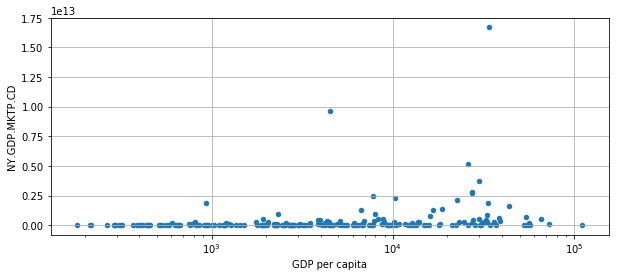

In [144]:
%matplotlib inline
gdpVsPopulationVsEducation.plot(x=GDPCAPITA, y=EDUCATION, kind='scatter', grid=True, logx=True, figsize=(10, 4))

The scatterplot there is not much correlation as there is not much variation in terms of education. However, it is notable that there countreis with higher GDP per capita also show some countries with much higher education proportions than the rest.


## Conclusions

In summary, the above analysis indicates that there is not a strong correlation between a country's wealth defined as GDP per capita, and the primary school enrollment ratio. 
While there is much variation in GDP, the dataset does not vary much for education. Enrollment in primary school may not be a very useful indicator of a country's wealth, there would
be merit in repeating the above analysis with more fine grained education data. 
